<a href="https://colab.research.google.com/github/sahalshajahan/Car-Resale-Price-UK-/blob/main/Car_Resale_Price(UK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The used car market is a dynamic and ever-changing landscape. Accurately predicting the resale price of a car is crucial for both buyers and sellers.  This project aims to leverage the power of machine learning to develop a model that can effectively predict the resale price of used cars in UK by building a robust and generalizable ML model. This model will take into account various factors that influence a car's resale value, such as:**

* `Car Brand`
* `Model`
* `Registration Year`
* `Transmission`
* `Fuel Type`
* `Distance Traveled (in miles)`
* `Engine Size`
* `mpg (miles per gallon)`
* `Road Tax`







# Importing Required Libraries

In [ ]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Dataset Loading

In [ ]:
os.listdir('/content/drive/MyDrive/Car resale dataset')

['ford.csv',
 'toyota.csv',
 'vauxhall.csv',
 'skoda.csv',
 'merc.csv',
 'vw.csv',
 'bmw.csv',
 'audi.csv',
 'hyundi.csv',
 'focus.csv',
 'cclass.csv']

In [ ]:
df = pd.DataFrame()
dir = '/content/drive/MyDrive/Car resale dataset'
files=os.listdir(dir)
for file in files:
    data = pd.read_csv(dir+'/'+file)
    data['Brand'] = file.split('.')[0]
    df = pd.concat([df,data])
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Fiesta,2017.0,12000,Automatic,15944,Petrol,150.0,57.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Focus,2018.0,14000,Manual,9083,Petrol,150.0,57.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Focus,2017.0,13000,Manual,12456,Petrol,150.0,57.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fiesta,2019.0,17500,Manual,10460,Petrol,145.0,40.3,1.5,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fiesta,2019.0,16500,Automatic,1482,Petrol,145.0,48.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",NaN,NaN,NaN,NaN,cclass,NaN,25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",NaN,NaN,NaN,NaN,cclass,NaN,31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",NaN,NaN,NaN,NaN,cclass,NaN,31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",NaN,NaN,NaN,NaN,cclass,NaN,46,£145,56.5,Diesel,2.143,/ad/25144481


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108797 entries, 0 to 4005
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108642 non-null  object 
 1   year          108550 non-null  float64
 2   price         108642 non-null  object 
 3   transmission  108642 non-null  object 
 4   mileage       107724 non-null  object 
 5   fuelType      99187 non-null   object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    99187 non-null   float64
 9   Brand         108797 non-null  object 
 10  tax(£)        4860 non-null    float64
 11  fuel type     3517 non-null    object 
 12  engine size   9345 non-null    object 
 13  mileage2      9399 non-null    object 
 14  fuel type2    8537 non-null    object 
 15  engine size2  8537 non-null    object 
 16  reference     9455 non-null    object 
dtypes: float64(5), object(12)
memory usage: 14.9+ MB


# Data Cleaning

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Fiesta,2017.0,12000,Automatic,15944,Petrol,150.0,57.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Focus,2018.0,14000,Manual,9083,Petrol,150.0,57.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Focus,2017.0,13000,Manual,12456,Petrol,150.0,57.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fiesta,2019.0,17500,Manual,10460,Petrol,145.0,40.3,1.5,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fiesta,2019.0,16500,Automatic,1482,Petrol,145.0,48.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108792,C Class,2017.0,"£14,700",Manual,"31,357",NaN,NaN,NaN,NaN,cclass,NaN,25,£150,70.6,Diesel,1.598,/ad/25451436
108793,C Class,2018.0,"£18,500",Automatic,"28,248",NaN,NaN,NaN,NaN,cclass,NaN,31,£150,64.2,Diesel,2.143,/ad/25451481
108794,C Class,2014.0,"£11,900",Manual,"48,055",NaN,NaN,NaN,NaN,cclass,NaN,31,£20,65.7,Diesel,2.143,/ad/25057204
108795,C Class,2014.0,"£11,300",Automatic,"49,865",NaN,NaN,NaN,NaN,cclass,NaN,46,£145,56.5,Diesel,2.143,/ad/25144481


Brand

In [ ]:
df['Brand'].unique()

array(['ford', 'toyota', 'vauxhall', 'skoda', 'merc', 'vw', 'bmw', 'audi',
       'hyundi', 'focus', 'cclass'], dtype=object)

In [ ]:
df['Brand'] = df['Brand'].replace('focus', 'ford')
df['Brand'] = df['Brand'].replace('cclass', 'merc')

In [ ]:
df['Brand'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 108797 entries, 0 to 108796
Series name: Brand
Non-Null Count   Dtype 
--------------   ----- 
108797 non-null  object
dtypes: object(1)
memory usage: 850.1+ KB


Model

In [ ]:
df['model'].isna().sum()

155

In [ ]:
df[df['model'].isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
102804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,merc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,merc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,merc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,merc,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(axis=0,subset=['model'],inplace=True)

In [ ]:
df['model'].info()

<class 'pandas.core.series.Series'>
Int64Index: 108642 entries, 0 to 108796
Series name: model
Non-Null Count   Dtype 
--------------   ----- 
108642 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


Year

In [ ]:
df['year'].isna().sum()

92

In [ ]:
df[df['year'].isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
102791,Focus,NaN,"£15,495",Manual,"7,424",NaN,NaN,NaN,NaN,ford,NaN,24,£20,67.3,Diesel,2,/ad/20588023
102952,Focus,NaN,"£12,495",Manual,"9,581",NaN,NaN,NaN,NaN,ford,NaN,NaN,£145,61.4,Petrol,1,/ad/25144737
102953,Focus,NaN,"£15,495",Manual,"8,780",NaN,NaN,NaN,NaN,ford,NaN,NaN,£145,57.7,Petrol,1,/ad/25144738
102954,Focus,NaN,"£11,995",Manual,"13,700",NaN,NaN,NaN,NaN,ford,NaN,NaN,£145,61.4,Petrol,1,/ad/25142229
102964,Focus,NaN,"£11,495",Manual,"13,792",NaN,NaN,NaN,NaN,ford,NaN,11,£145,61.4,Petrol,1,/ad/25137591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103330,Focus,NaN,"£18,449",Manual,"9,964",NaN,NaN,NaN,NaN,ford,NaN,NaN,£145,41.5,Petrol,2,/ad/24534569
103387,Focus,NaN,"£7,795",Manual,"55,884",NaN,NaN,NaN,NaN,ford,NaN,NaN,£0,74.3,Diesel,1.5,/ad/25041971
104847,C Class,NaN,"£24,495",Automatic,"20,330",NaN,NaN,NaN,NaN,merc,NaN,38,£115,60.1,Diesel,2.1,/ad/20597531
107741,C Class,NaN,"£15,490",Automatic,NaN,NaN,NaN,NaN,NaN,merc,NaN,Diesel,2143,"33,000",NaN,NaN,/ad/25078211


In [ ]:
df['year'].fillna(df['year'].mode()[0],inplace=True)

In [ ]:
df['year'].unique()

array([2017., 2018., 2019., 2015., 2014., 2016., 2013., 2020., 2012.,
       2008., 2010., 2009., 2011., 1998., 2007., 2005., 2006., 2002.,
       2003., 1996., 2004., 2000., 2060., 2001., 1999., 1997., 1970.,
       1991., 1995.])

In [ ]:
df=df[df['year'] != 2060]

In [ ]:
df['year'] = df['year'].astype(int)

In [ ]:
df['year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 108641 entries, 0 to 108796
Series name: year
Non-Null Count   Dtype
--------------   -----
108641 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


Price

In [ ]:
df['price'].isna().sum()

0

In [ ]:
def add_space(text):
  return re.sub(r"([^\d])(\d+)", r"\1 \2", str(text))
df['price'] = df['price'].astype(str).apply(add_space)

In [ ]:
df['price']=df['price'].str.replace('£ ','')
df['price']=df['price'].str.replace(', ','')

In [ ]:
df['price'] = df['price'].astype(int)

In [ ]:
df['price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 108641 entries, 0 to 108796
Series name: price
Non-Null Count   Dtype
--------------   -----
108641 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


In [ ]:
df['price'].min()

450

In [ ]:
df=df[df['price']>1000]

In [ ]:
df['price'].max()

159999

In [ ]:
df=df[df['price']<75000]

Transmission

In [ ]:
df['transmission'].isna().sum()

0

In [ ]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

Mileage

In [ ]:
df['mileage'].isna().sum()

917

In [ ]:
df[df['mileage'].isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
99187,Focus,2016,8000,Manual,NaN,NaN,NaN,NaN,NaN,ford,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236
99188,Focus,2019,13400,Manual,NaN,NaN,NaN,NaN,NaN,ford,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927
99189,Focus,2019,14600,Manual,NaN,NaN,NaN,NaN,NaN,ford,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363
99190,Focus,2016,9450,Manual,NaN,NaN,NaN,NaN,NaN,ford,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868
99191,Focus,2015,9999,Manual,NaN,NaN,NaN,NaN,NaN,ford,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108762,C Class,2020,34480,Automatic,NaN,NaN,NaN,NaN,NaN,merc,NaN,Diesel,2000,"3,000",NaN,NaN,/ad/25039369
108777,C Class,2016,14000,Automatic,NaN,NaN,NaN,NaN,NaN,merc,NaN,Diesel,2.1,"45,000",NaN,NaN,/ad/25438704
108778,C Class,2015,12000,Automatic,NaN,NaN,NaN,NaN,NaN,merc,NaN,Diesel,2.1,"40,005",NaN,NaN,/ad/25483276
108779,C Class,2017,22767,Automatic,NaN,NaN,NaN,NaN,NaN,merc,NaN,Diesel,2.1,"30,676",NaN,NaN,/ad/25474582


In [ ]:
df['mileage'] = df['mileage'].fillna(df['mileage2'])

In [ ]:
df.loc[99187]

model                  Focus
year                    2016
price                   8000
transmission          Manual
mileage               38,852
fuelType                 NaN
tax                      NaN
mpg                      NaN
engineSize               NaN
Brand                   ford
tax(£)                   NaN
fuel type             Petrol
engine size            0.999
mileage2              38,852
fuel type2               NaN
engine size2             NaN
reference       /ad/25451236
Name: 99187, dtype: object

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108792,C Class,2017,14700,Manual,"31,357",NaN,NaN,NaN,NaN,merc,NaN,25,£150,70.6,Diesel,1.598,/ad/25451436
108793,C Class,2018,18500,Automatic,"28,248",NaN,NaN,NaN,NaN,merc,NaN,31,£150,64.2,Diesel,2.143,/ad/25451481
108794,C Class,2014,11900,Manual,"48,055",NaN,NaN,NaN,NaN,merc,NaN,31,£20,65.7,Diesel,2.143,/ad/25057204
108795,C Class,2014,11300,Automatic,"49,865",NaN,NaN,NaN,NaN,merc,NaN,46,£145,56.5,Diesel,2.143,/ad/25144481


In [ ]:
df.loc[108792]

model                C Class
year                    2017
price                  14700
transmission          Manual
mileage               31,357
fuelType                 NaN
tax                      NaN
mpg                      NaN
engineSize               NaN
Brand                   merc
tax(£)                   NaN
fuel type                 25
engine size             £150
mileage2                70.6
fuel type2            Diesel
engine size2           1.598
reference       /ad/25451436
Name: 108792, dtype: object

In [ ]:
df['mileage'].isna().sum()

0

In [ ]:
df['mileage'].info()

<class 'pandas.core.series.Series'>
Int64Index: 108471 entries, 0 to 108796
Series name: mileage
Non-Null Count   Dtype 
--------------   ----- 
108471 non-null  object
dtypes: object(1)
memory usage: 5.7+ MB


In [ ]:
def add_space(text):
  return re.sub(r"([^\d])(\d+)", r"\1 \2", str(text))
df['mileage'] = df['mileage'].astype(str).apply(add_space)

In [ ]:
df['mileage']=df['mileage'].str.replace(', ','')

In [ ]:
df[df['mileage']=='Unknown']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
103994,Focus,2008,1675,Manual,Unknown,NaN,NaN,NaN,NaN,ford,NaN,18,NaN,NaN,Diesel,Unknown,/ad/23710434
108680,C Class,2020,39950,Automatic,Unknown,NaN,NaN,NaN,NaN,merc,NaN,Hybrid,2000,Unknown,NaN,NaN,/ad/25482786
108712,C Class,2020,42890,Automatic,Unknown,NaN,NaN,NaN,NaN,merc,NaN,NaN,NaN,217.3,Hybrid,2000,/ad/25049921
108713,C Class,2020,36890,Automatic,Unknown,NaN,NaN,NaN,NaN,merc,NaN,NaN,£145,64.2,Diesel,2000,/ad/25049926
108733,C Class,2020,36890,Automatic,Unknown,NaN,NaN,NaN,NaN,merc,NaN,NaN,£145,61.4,Diesel,2000,/ad/25049931


In [ ]:
df=df[df['mileage'] !='Unknown']

In [ ]:
df['mileage'] = df['mileage'].astype(int)

In [ ]:
df.drop('mileage2',axis=1,inplace=True)

In [ ]:
df=df.rename(columns={'mileage': 'miles'})

In [ ]:
df['miles'].info()

<class 'pandas.core.series.Series'>
Int64Index: 108466 entries, 0 to 108796
Series name: miles
Non-Null Count   Dtype
--------------   -----
108466 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


In [ ]:
df['miles'].min()

1

In [ ]:
df=df[df['miles']>500]

In [ ]:
df['miles'].max()

323000

In [ ]:
df=df[df['miles']<200000]

Fuel Type

In [ ]:
df['fuelType'].isna().sum()

9242

In [ ]:
df[df['fuelType'].isna()]

,model,year,price,transmission,miles,fuelType,tax,mpg,engineSize,Brand,tax(£),fuel type,engine size,fuel type2,engine size2,reference
99187,Focus,2016,8000,Manual,38852,NaN,NaN,NaN,NaN,ford,NaN,Petrol,0.999,NaN,NaN,/ad/25451236
99188,Focus,2019,13400,Manual,11952,NaN,NaN,NaN,NaN,ford,NaN,Petrol,0.999,NaN,NaN,/ad/25466927
99189,Focus,2019,14600,Manual,22142,NaN,NaN,NaN,NaN,ford,NaN,Petrol,1.498,NaN,NaN,/ad/25484363
99190,Focus,2016,9450,Manual,14549,NaN,NaN,NaN,NaN,ford,NaN,Diesel,1.56,NaN,NaN,/ad/20444868
99191,Focus,2015,9999,Manual,7010,NaN,NaN,NaN,NaN,ford,NaN,Diesel,1.56,NaN,NaN,/ad/22551057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108792,C Class,2017,14700,Manual,31357,NaN,NaN,NaN,NaN,merc,NaN,25,£150,Diesel,1.598,/ad/25451436
108793,C Class,2018,18500,Automatic,28248,NaN,NaN,NaN,NaN,merc,NaN,31,£150,Diesel,2.143,/ad/25451481
108794,C Class,2014,11900,Manual,48055,NaN,NaN,NaN,NaN,merc,NaN,31,£20,Diesel,2.143,/ad/25057204
108795,C Class,2014,11300,Automatic,49865,NaN,NaN,NaN,NaN,merc,NaN,46,£145,Diesel,2.143,/ad/25144481


In [ ]:
df['fuel type'].isna().sum()

100726

In [ ]:
df.loc[pd.to_numeric(df['fuel type'], errors='coerce').notnull(), 'fuel type'] =np.NaN

In [ ]:
df['fuel type'].isna().sum()

103317

In [ ]:
df[df['fuelType'].isna()]

,model,year,price,transmission,miles,fuelType,tax,mpg,engineSize,Brand,tax(£),fuel type,engine size,fuel type2,engine size2,reference
99187,Focus,2016,8000,Manual,38852,NaN,NaN,NaN,NaN,ford,NaN,Petrol,0.999,NaN,NaN,/ad/25451236
99188,Focus,2019,13400,Manual,11952,NaN,NaN,NaN,NaN,ford,NaN,Petrol,0.999,NaN,NaN,/ad/25466927
99189,Focus,2019,14600,Manual,22142,NaN,NaN,NaN,NaN,ford,NaN,Petrol,1.498,NaN,NaN,/ad/25484363
99190,Focus,2016,9450,Manual,14549,NaN,NaN,NaN,NaN,ford,NaN,Diesel,1.56,NaN,NaN,/ad/20444868
99191,Focus,2015,9999,Manual,7010,NaN,NaN,NaN,NaN,ford,NaN,Diesel,1.56,NaN,NaN,/ad/22551057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108792,C Class,2017,14700,Manual,31357,NaN,NaN,NaN,NaN,merc,NaN,NaN,£150,Diesel,1.598,/ad/25451436
108793,C Class,2018,18500,Automatic,28248,NaN,NaN,NaN,NaN,merc,NaN,NaN,£150,Diesel,2.143,/ad/25451481
108794,C Class,2014,11900,Manual,48055,NaN,NaN,NaN,NaN,merc,NaN,NaN,£20,Diesel,2.143,/ad/25057204
108795,C Class,2014,11300,Automatic,49865,NaN,NaN,NaN,NaN,merc,NaN,NaN,£145,Diesel,2.143,/ad/25144481


In [ ]:
df['fuel type'] = df['fuel type'].fillna(df['fuel type2'])

In [ ]:
df['fuel type'].isna().sum()

94968

In [ ]:
df['fuelType'] = df['fuelType'].fillna(df['fuel type'])

In [ ]:
df['fuelType'].isna().sum()

0

In [ ]:
df.drop(['fuel type','fuel type2'],axis=1,inplace=True)

In [ ]:
df.loc[108792]

model                C Class
year                    2017
price                  14700
transmission          Manual
miles                  31357
fuelType              Diesel
tax                      NaN
mpg                      NaN
engineSize               NaN
Brand                   merc
tax(£)                   NaN
engine size             £150
engine size2           1.598
reference       /ad/25451436
Name: 108792, dtype: object

In [ ]:
df.loc[99187]

model                  Focus
year                    2016
price                   8000
transmission          Manual
miles                  38852
fuelType              Petrol
tax                      NaN
mpg                      NaN
engineSize               NaN
Brand                   ford
tax(£)                   NaN
engine size            0.999
engine size2             NaN
reference       /ad/25451236
Name: 99187, dtype: object

In [ ]:
df['fuelType'].info()

<class 'pandas.core.series.Series'>
Int64Index: 104210 entries, 0 to 108796
Series name: fuelType
Non-Null Count   Dtype 
--------------   ----- 
104210 non-null  object
dtypes: object(1)
memory usage: 5.6+ MB


In [ ]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

Tax

In [ ]:
df['tax'].isna().sum()

13895

In [ ]:
df[df['tax'].isna()]

,model,year,price,transmission,miles,fuelType,tax,mpg,engineSize,Brand,tax(£),engine size,engine size2,reference
94327,I20,2017,7999,Manual,17307,Petrol,NaN,58.9,1.2,hyundi,145.0,NaN,NaN,NaN
94328,Tucson,2016,14499,Automatic,25233,Diesel,NaN,43.5,2.0,hyundi,235.0,NaN,NaN,NaN
94329,Tucson,2016,11399,Manual,37877,Diesel,NaN,61.7,1.7,hyundi,30.0,NaN,NaN,NaN
94330,I10,2016,6499,Manual,23789,Petrol,NaN,60.1,1.0,hyundi,20.0,NaN,NaN,NaN
94331,IX35,2015,10199,Manual,33177,Diesel,NaN,51.4,2.0,hyundi,160.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108792,C Class,2017,14700,Manual,31357,Diesel,NaN,NaN,NaN,merc,NaN,£150,1.598,/ad/25451436
108793,C Class,2018,18500,Automatic,28248,Diesel,NaN,NaN,NaN,merc,NaN,£150,2.143,/ad/25451481
108794,C Class,2014,11900,Manual,48055,Diesel,NaN,NaN,NaN,merc,NaN,£20,2.143,/ad/25057204
108795,C Class,2014,11300,Automatic,49865,Diesel,NaN,NaN,NaN,merc,NaN,£145,2.143,/ad/25144481


In [ ]:
df['tax'] = df['tax'].fillna(df['tax(£)'])

In [ ]:
df['tax'].isna().sum()

9242

In [ ]:
df[df['tax'].isna()]

,model,year,price,transmission,miles,fuelType,tax,mpg,engineSize,Brand,tax(£),engine size,engine size2,reference
99187,Focus,2016,8000,Manual,38852,Petrol,NaN,NaN,NaN,ford,NaN,0.999,NaN,/ad/25451236
99188,Focus,2019,13400,Manual,11952,Petrol,NaN,NaN,NaN,ford,NaN,0.999,NaN,/ad/25466927
99189,Focus,2019,14600,Manual,22142,Petrol,NaN,NaN,NaN,ford,NaN,1.498,NaN,/ad/25484363
99190,Focus,2016,9450,Manual,14549,Diesel,NaN,NaN,NaN,ford,NaN,1.56,NaN,/ad/20444868
99191,Focus,2015,9999,Manual,7010,Diesel,NaN,NaN,NaN,ford,NaN,1.56,NaN,/ad/22551057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108792,C Class,2017,14700,Manual,31357,Diesel,NaN,NaN,NaN,merc,NaN,£150,1.598,/ad/25451436
108793,C Class,2018,18500,Automatic,28248,Diesel,NaN,NaN,NaN,merc,NaN,£150,2.143,/ad/25451481
108794,C Class,2014,11900,Manual,48055,Diesel,NaN,NaN,NaN,merc,NaN,£20,2.143,/ad/25057204
108795,C Class,2014,11300,Automatic,49865,Diesel,NaN,NaN,NaN,merc,NaN,£145,2.143,/ad/25144481


In [ ]:
df.dropna(axis=0,subset=['tax'],inplace=True)

In [ ]:
df.drop('tax(£)', axis=1, inplace=True)

In [ ]:
df['tax'].isna().sum()

0

In [ ]:
df['tax'].info()

<class 'pandas.core.series.Series'>
Int64Index: 94968 entries, 0 to 99186
Series name: tax
Non-Null Count  Dtype  
--------------  -----  
94968 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [ ]:
df['tax'] = df['tax'].astype(int)

In [ ]:
df['tax'].min()

0

In [ ]:
df['tax'].max()

580

mpg

In [ ]:
df['mpg'].isna().sum()

0

In [ ]:
df['mpg'].min()

1.1

In [ ]:
df=df[df['mpg']>15]

In [ ]:
df['mpg'].max()

470.8

In [ ]:
df=df[df['mpg']<70]

In [ ]:
df.loc[df['fuelType']=='Electric'][['mpg']]

,mpg
6385,67.3
11959,67.3


In [ ]:
mpg=df.loc[df['fuelType']=='Electric'][['mpg']].replace(67.3,0)

In [ ]:
df.update(mpg)

In [ ]:
df['mpg'].info()

<class 'pandas.core.series.Series'>
Int64Index: 86874 entries, 0 to 99186
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
86874 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


Engine Size

In [ ]:
df['engineSize'].isna().sum()

0

In [ ]:
df.drop(['engine size','engine size2'], axis=1, inplace=True)

In [ ]:
df['engineSize'].min()

0.0

In [ ]:
engine=df.loc[df['engineSize']==0.0][['fuelType']]
engine['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other'], dtype=object)

In [ ]:
df=df[df['engineSize']>0.0]

In [ ]:
df['engineSize'].min()

1.0

In [ ]:
df['engineSize'].max()

6.6

In [ ]:
df.loc[df['engineSize']==6.6][['Brand','model','year']]

,Brand,model,year
82463,bmw,7 Series,2017
82677,bmw,7 Series,2017


In [ ]:
df.loc[df['fuelType']=='Electric'][['engineSize']]

,engineSize
6385,2.0
11959,2.0


In [ ]:
electric=df.loc[df['fuelType']=='Electric'][['engineSize']].replace(2,0)

In [ ]:
df.update(electric)

In [ ]:
df['engineSize'].info()

<class 'pandas.core.series.Series'>
Int64Index: 86654 entries, 0 to 99186
Series name: engineSize
Non-Null Count  Dtype  
--------------  -----  
86654 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [ ]:
df.drop('reference', axis=1, inplace=True)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.reset_index(drop=True,inplace=True)

# Cleaned Data

In [ ]:
df

,model,year,price,transmission,miles,fuelType,tax,mpg,engineSize,Brand
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,ford
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,ford
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,ford
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,ford
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,ford
...,...,...,...,...,...,...,...,...,...,...
85807,Santa Fe,2019,29995,Semi-Auto,1567,Diesel,145,39.8,2.2,hyundi
85808,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,hyundi
85809,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,hyundi
85810,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,hyundi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85812 entries, 0 to 85811
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         85812 non-null  object 
 1   year          85812 non-null  int64  
 2   price         85812 non-null  int64  
 3   transmission  85812 non-null  object 
 4   miles         85812 non-null  int64  
 5   fuelType      85812 non-null  object 
 6   tax           85812 non-null  int64  
 7   mpg           85812 non-null  float64
 8   engineSize    85812 non-null  float64
 9   Brand         85812 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 6.5+ MB


In [ ]:
# df.to_csv('clean_data.csv')

# EDA

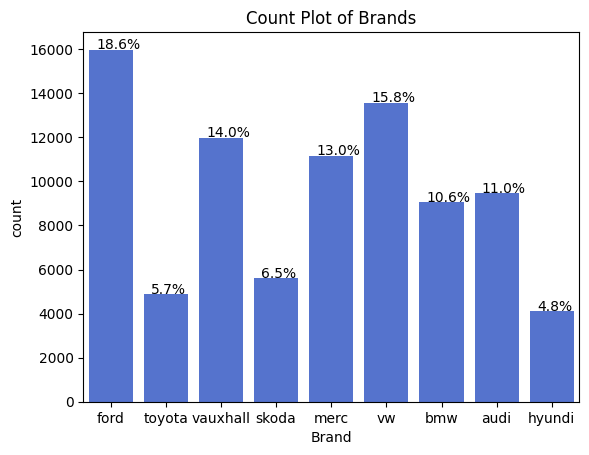

In [ ]:
count=sns.countplot(x='Brand',data=df,color='royalblue')
plt.title('Count Plot of Brands')
total = len(df)
for i in count.patches:
  height = i.get_height()
  percentage = "{:.1f}%".format(100 * height / total)
  x = i.get_x() + i.get_width() / 6
  y = height + 30
  count.annotate(percentage, (x, y))

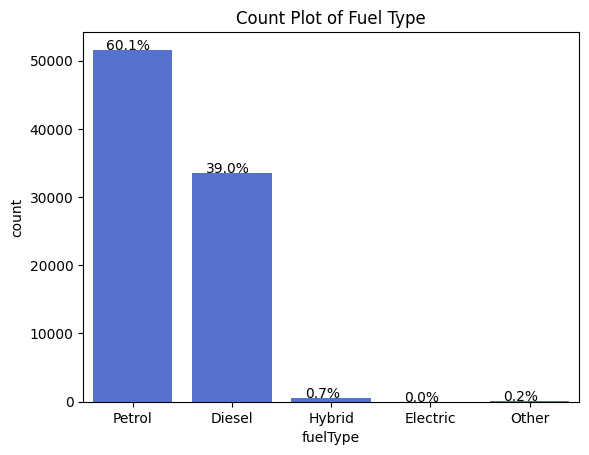

In [ ]:
count=sns.countplot(x='fuelType',data=df,color='royalblue')
plt.title('Count Plot of Fuel Type')
total = len(df)
for i in count.patches:
  height = i.get_height()
  percentage = "{:.1f}%".format(100 * height / total)
  x = i.get_x() + i.get_width() / 6
  y = height + 30
  count.annotate(percentage, (x, y))

Text(0.5, 1.0, 'Brand vs Price')

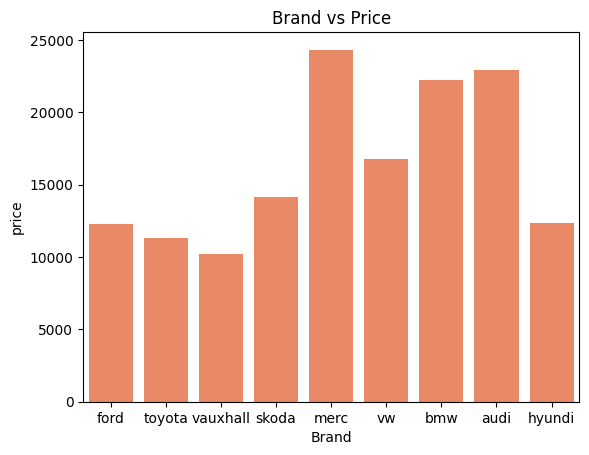

In [ ]:
sns.barplot(x='Brand',y='price',data=df,errorbar=None,color='coral')
plt.title('Brand vs Price')

Text(0.5, 1.0, 'Engine Size vs Fuel Type')

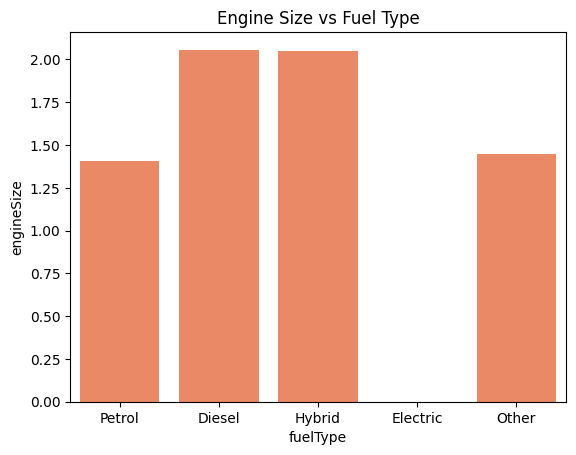

In [ ]:
sns.barplot(x='fuelType',y='engineSize',data=df,errorbar=None,color='coral')
plt.title('Engine Size vs Fuel Type')

In [ ]:
df['transmission'].value_counts()

Manual       49479
Semi-Auto    20097
Automatic    16230
Other            6
Name: transmission, dtype: int64

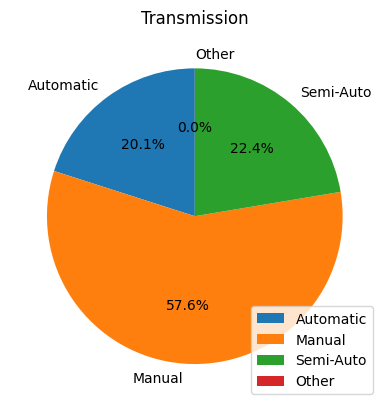

In [ ]:
y=[18703,53704,20851,8]
lbl=['Automatic', 'Manual', 'Semi-Auto', 'Other']
plt.pie(y,labels=lbl,autopct='%1.1f%%', startangle=90)
plt.legend(loc='lower right')
plt.title('Transmission')
plt.show()

In [ ]:
t= df.groupby('year')['price'].mean()

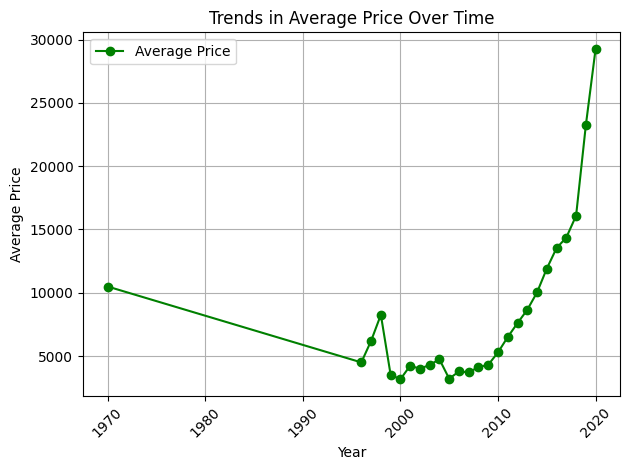

In [ ]:
plt.plot(t.index, t.values, marker='o', linestyle='-', color='g', label='Average Price')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Trends in Average Price Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

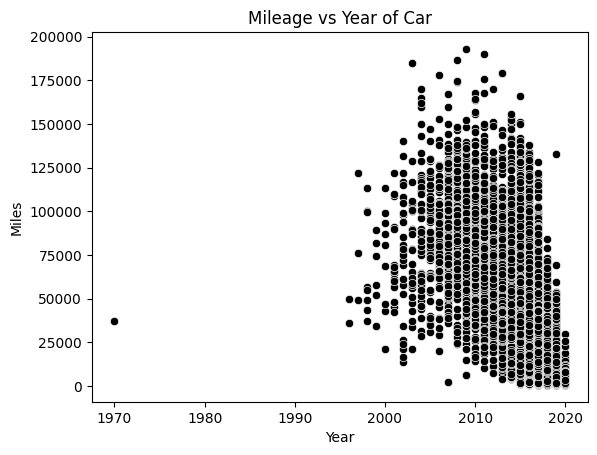

In [ ]:
sns.scatterplot(x = "year", y = "miles", data=df, color='black')
plt.title('Mileage vs Year of Car')
plt.xlabel('Year')
plt.ylabel('Miles')
plt.show()

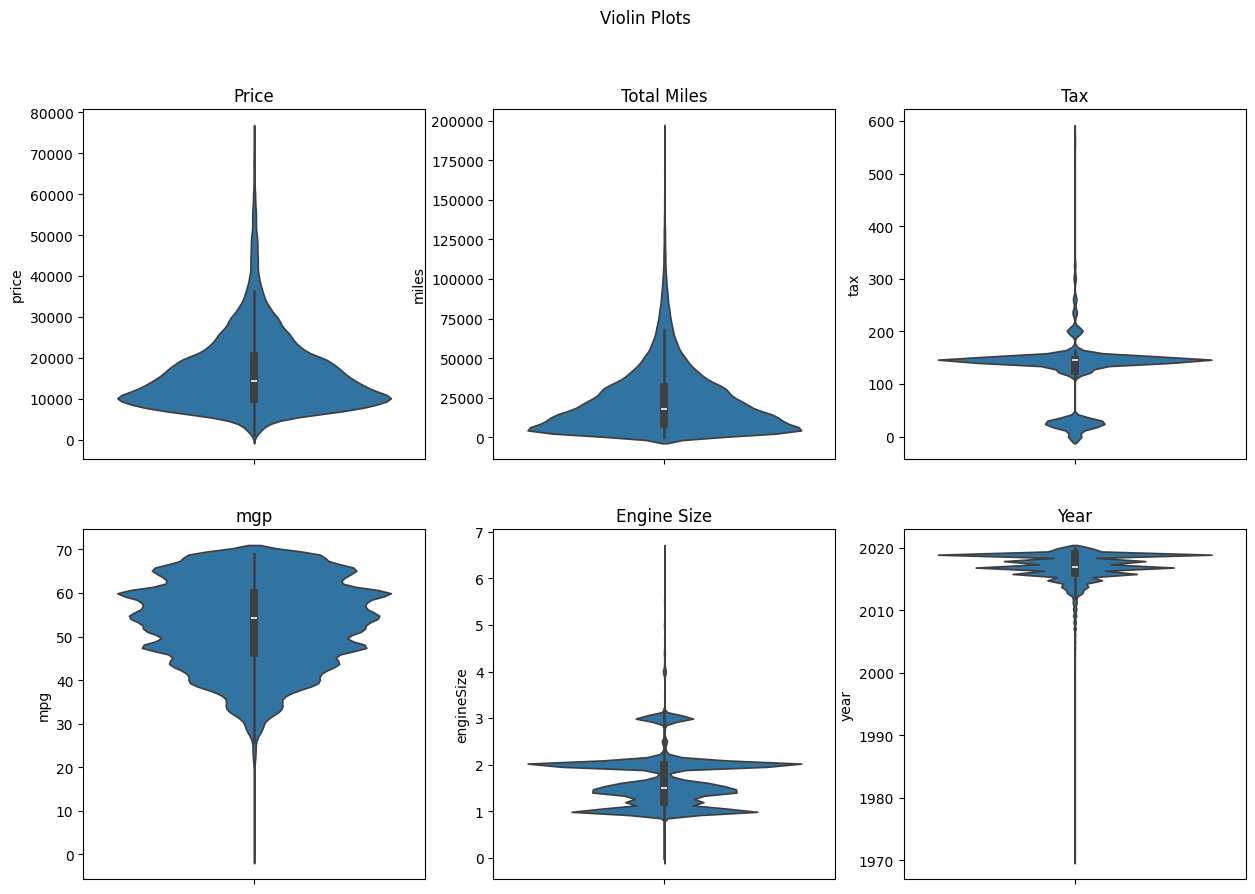

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
sns.violinplot(y='price',ax=axes[0,0],data=df)
sns.violinplot(y='miles',ax=axes[0,1],data=df)
sns.violinplot(y='tax',ax=axes[0,2],data=df)
sns.violinplot(y='mpg',ax=axes[1,0],data=df)
sns.violinplot(y='engineSize',ax=axes[1,1],data=df)
sns.violinplot(y='year',ax=axes[1,2],data=df)
axes[0,0].set_title('Price')
axes[0,1].set_title('Total Miles')
axes[0,2].set_title('Tax')
axes[1,0].set_title('mgp')
axes[1,1].set_title('Engine Size')
axes[1,2].set_title('Year')
plt.suptitle('Violin Plots')
plt.show()

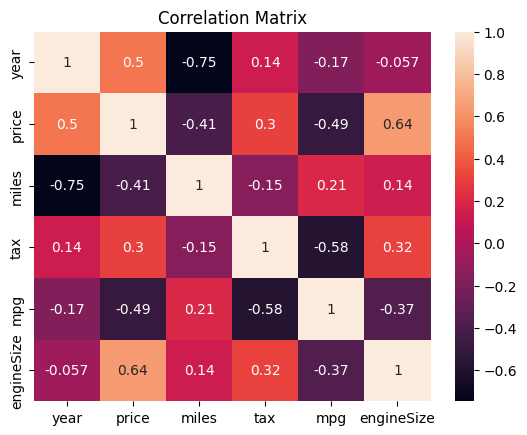

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

# Pre-processing

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'miles', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Brand'],
      dtype='object')

In [ ]:
# df.drop('model',axis=1,inplace=True)

In [ ]:
le1=LabelEncoder()
df['transmission']=le1.fit_transform(df['transmission'])
le2=LabelEncoder()
df['fuelType']=le2.fit_transform(df['fuelType'])
le3=LabelEncoder()
df['Brand']=le3.fit_transform(df['Brand'])
le4=LabelEncoder()
df['model']=le4.fit_transform(df['model'])

In [ ]:
list(zip(le1.classes_ ,le1.transform(le1.classes_)))

[('Automatic', 0), ('Manual', 1), ('Other', 2), ('Semi-Auto', 3)]

In [ ]:
list(zip(le2.classes_ ,le2.transform(le2.classes_)))

[('Diesel', 0), ('Electric', 1), ('Hybrid', 2), ('Other', 3), ('Petrol', 4)]

In [ ]:
list(zip(le3.classes_ ,le3.transform(le3.classes_)))

[('audi', 0),
 ('bmw', 1),
 ('ford', 2),
 ('hyundi', 3),
 ('merc', 4),
 ('skoda', 5),
 ('toyota', 6),
 ('vauxhall', 7),
 ('vw', 8)]

In [ ]:
list(zip(le4.classes_ ,le4.transform(le4.classes_)))

[(' 1 Series', 0),
 (' 2 Series', 1),
 (' 3 Series', 2),
 (' 4 Series', 3),
 (' 5 Series', 4),
 (' 6 Series', 5),
 (' 7 Series', 6),
 (' 8 Series', 7),
 (' A Class', 8),
 (' A1', 9),
 (' A2', 10),
 (' A3', 11),
 (' A4', 12),
 (' A5', 13),
 (' A6', 14),
 (' A7', 15),
 (' A8', 16),
 (' Accent', 17),
 (' Adam', 18),
 (' Agila', 19),
 (' Amarok', 20),
 (' Amica', 21),
 (' Antara', 22),
 (' Arteon', 23),
 (' Astra', 24),
 (' Auris', 25),
 (' Avensis', 26),
 (' Aygo', 27),
 (' B Class', 28),
 (' B-MAX', 29),
 (' Beetle', 30),
 (' C Class', 31),
 (' C-HR', 32),
 (' C-MAX', 33),
 (' CC', 34),
 (' CL Class', 35),
 (' CLA Class', 36),
 (' CLC Class', 37),
 (' CLK', 38),
 (' CLS Class', 39),
 (' Caddy', 40),
 (' Caddy Life', 41),
 (' Caddy Maxi', 42),
 (' Caddy Maxi Life', 43),
 (' California', 44),
 (' Camry', 45),
 (' Caravelle', 46),
 (' Cascada', 47),
 (' Citigo', 48),
 (' Combo Life', 49),
 (' Corolla', 50),
 (' Corsa', 51),
 (' Crossland X', 52),
 (' E Class', 53),
 (' EcoSport', 54),
 (' E

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85812 entries, 0 to 85811
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         85812 non-null  int64  
 1   year          85812 non-null  int64  
 2   price         85812 non-null  int64  
 3   transmission  85812 non-null  int64  
 4   miles         85812 non-null  int64  
 5   fuelType      85812 non-null  int64  
 6   tax           85812 non-null  int64  
 7   mpg           85812 non-null  float64
 8   engineSize    85812 non-null  float64
 9   Brand         85812 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 6.5 MB


In [ ]:
df.corr()

,model,year,price,transmission,miles,fuelType,tax,mpg,engineSize,Brand
model,1.000000,0.029064,0.041257,-0.032211,-0.034971,-0.018151,0.099172,-0.202251,0.000691,0.310376
year,0.029064,1.000000,0.497745,0.137477,-0.746175,0.058637,0.138027,-0.167951,-0.056785,0.018957
price,0.041257,0.497745,1.000000,0.250186,-0.408604,-0.303947,0.298181,-0.487317,0.643311,-0.238398
transmission,-0.032211,0.137477,0.250186,1.000000,-0.120509,-0.080564,0.039101,-0.073810,0.147228,-0.064651
miles,-0.034971,-0.746175,-0.408604,-0.120509,1.000000,-0.216259,-0.146724,0.207395,0.139155,-0.040544
fuelType,-0.018151,0.058637,-0.303947,-0.080564,-0.216259,1.000000,0.024943,-0.234111,-0.564830,0.158176
tax,0.099172,0.138027,0.298181,0.039101,-0.146724,0.024943,1.000000,-0.576002,0.315306,-0.059106
mpg,-0.202251,-0.167951,-0.487317,-0.073810,0.207395,-0.234111,-0.576002,1.000000,-0.373344,-0.006814
engineSize,0.000691,-0.056785,0.643311,0.147228,0.139155,-0.564830,0.315306,-0.373344,1.000000,-0.231065
Brand,0.310376,0.018957,-0.238398,-0.064651,-0.040544,0.158176,-0.059106,-0.006814,-0.231065,1.000000


In [ ]:
X=df.drop('price',axis=1)
X

,model,year,transmission,miles,fuelType,tax,mpg,engineSize,Brand
0,59,2017,0,15944,4,150,57.7,1.0,2
1,60,2018,1,9083,4,150,57.7,1.0,2
2,60,2017,1,12456,4,150,57.7,1.0,2
3,59,2019,1,10460,4,145,40.3,1.5,2
4,59,2019,0,1482,4,145,48.7,1.0,2
...,...,...,...,...,...,...,...,...,...
85807,143,2019,3,1567,0,145,39.8,2.2,3
85808,83,2015,1,59508,0,30,65.7,1.7,3
85809,80,2017,1,13810,4,20,60.1,1.0,3
85810,163,2018,1,23313,4,145,44.8,1.6,3


In [ ]:
y=df['price']
y

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
85807    29995
85808     7830
85809     6830
85810    13994
85811    15999
Name: price, Length: 85812, dtype: int64

In [ ]:
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X)
X_scaled

array([[0.31216931, 0.94      , 0.        , ..., 0.83623188, 0.15151515,
        0.25      ],
       [0.31746032, 0.96      , 0.33333333, ..., 0.83623188, 0.15151515,
        0.25      ],
       [0.31746032, 0.94      , 0.33333333, ..., 0.83623188, 0.15151515,
        0.25      ],
       ...,
       [0.42328042, 0.94      , 0.33333333, ..., 0.87101449, 0.15151515,
        0.375     ],
       [0.86243386, 0.96      , 0.33333333, ..., 0.64927536, 0.24242424,
        0.375     ],
       [0.86243386, 0.92      , 0.        , ..., 0.83478261, 0.25757576,
        0.375     ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,y_train.shape

((60068, 9), (60068,))

In [ ]:
X_test.shape,y_test.shape

((25744, 9), (25744,))

# PyCaret - Model Evaluation

In [ ]:
# !pip install pycaret

In [ ]:
# from pycaret.regression import*
# setup(df,target='price')

In [ ]:
# compare_models()

In [ ]:
# RandomForestRegressor(n_jobs=-1, random_state=3786)
# 1314.0451	4270441.2291	2065.4892	0.9484	0.1163	0.0845

# Removing Outliers

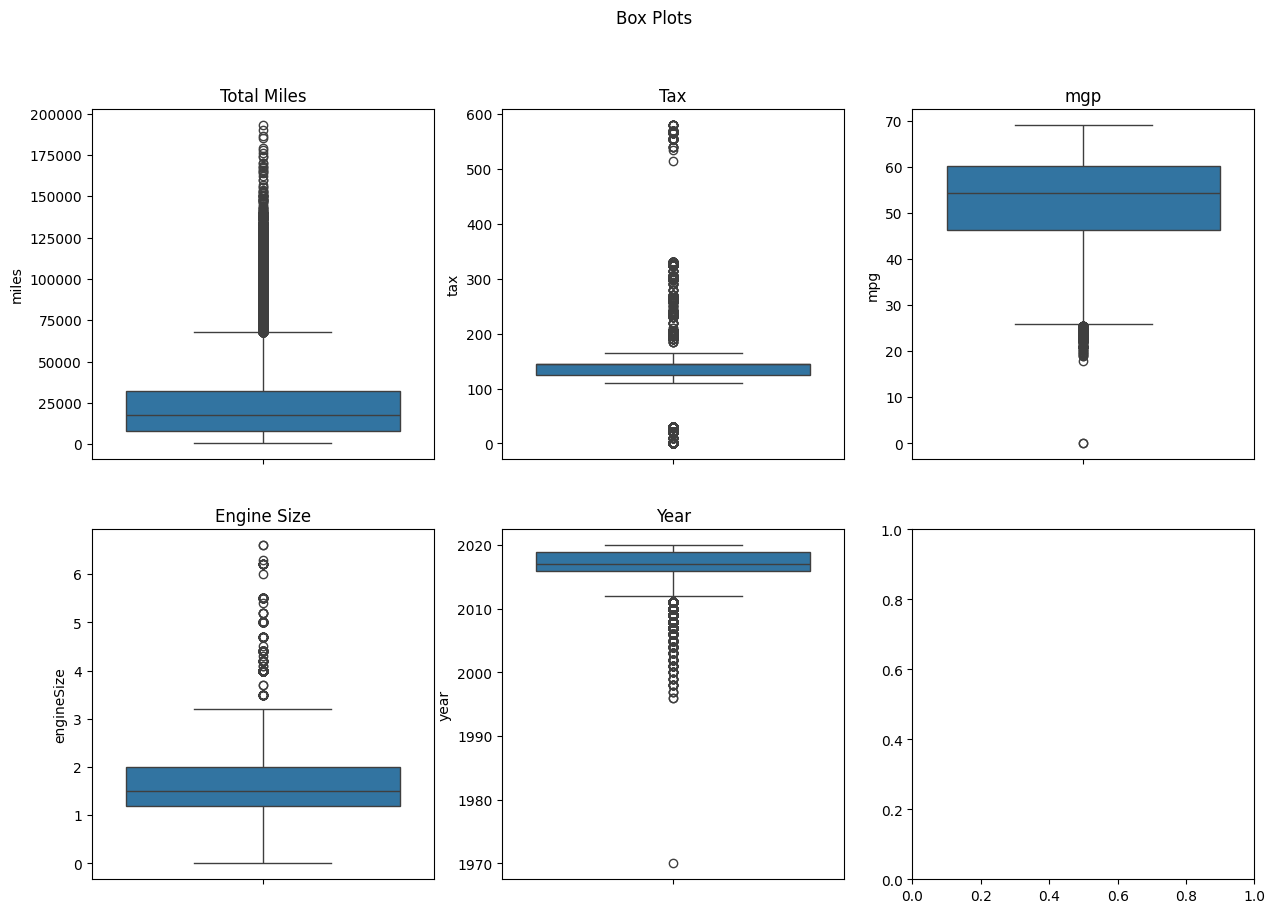

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(y='miles',ax=axes[0,0],data=df)
sns.boxplot(y='tax',ax=axes[0,1],data=df)
sns.boxplot(y='mpg',ax=axes[0,2],data=df)
sns.boxplot(y='engineSize',ax=axes[1,0],data=df)
sns.boxplot(y='year',ax=axes[1,1],data=df)
axes[0,0].set_title('Total Miles')
axes[0,1].set_title('Tax')
axes[0,2].set_title('mgp')
axes[1,0].set_title('Engine Size')
axes[1,1].set_title('Year')
plt.suptitle('Box Plots')
plt.show()

In [ ]:
def remove_outliers(df, columns):
  df_out = df.copy()
  for col in columns:
    q1 = df_out[col].quantile(0.25)
    q3 = df_out[col].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    df_out = df_out[ (df_out[col] > lb) & (df_out[col] < ub) ]
  return df_out

In [ ]:
df_out = remove_outliers(df.copy(),['miles','tax','mpg','engineSize','year'])

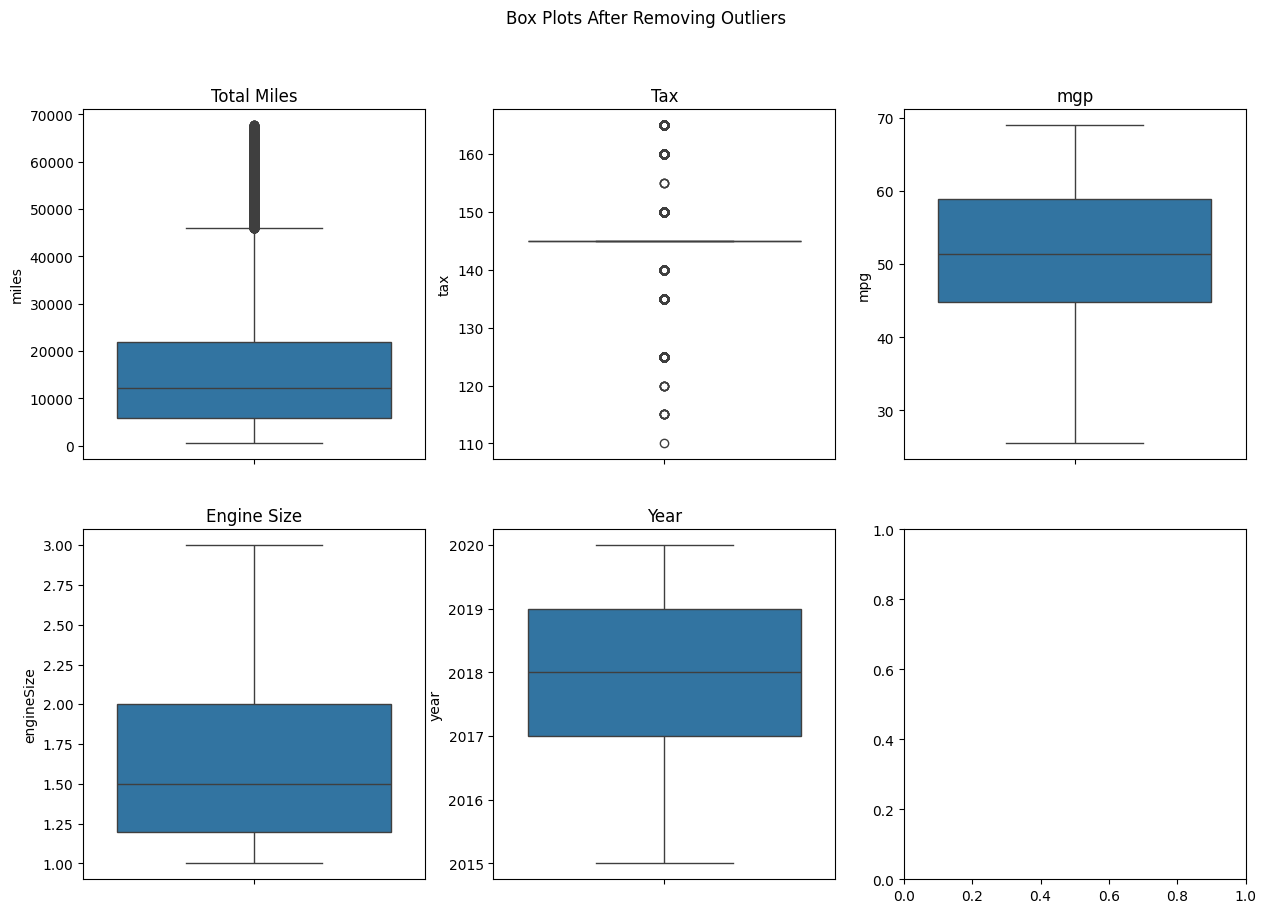

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(y='miles',ax=axes[0,0],data=df_out)
sns.boxplot(y='tax',ax=axes[0,1],data=df_out)
sns.boxplot(y='mpg',ax=axes[0,2],data=df_out)
sns.boxplot(y='engineSize',ax=axes[1,0],data=df_out)
sns.boxplot(y='year',ax=axes[1,1],data=df_out)
axes[0,0].set_title('Total Miles')
axes[0,1].set_title('Tax')
axes[0,2].set_title('mgp')
axes[1,0].set_title('Engine Size')
axes[1,1].set_title('Year')
plt.suptitle('Box Plots After Removing Outliers')
plt.show()

In [ ]:
# from pycaret.regression import*
# setup(df_out,target='price')

,Description,Value
0,Session id,5434
1,Target,price
2,Target type,Regression
3,Original data shape,"(60774, 10)"
4,Transformed data shape,"(60774, 10)"
5,Transformed train set shape,"(42541, 10)"
6,Transformed test set shape,"(18233, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1257.5476,3445383.9552,1854.5946,0.9584,0.0902,0.0688,0.3580
rf,Random Forest Regressor,1249.1120,3664923.0703,1913.2865,0.9557,0.0915,0.0679,13.5800
et,Extra Trees Regressor,1301.4109,3996489.9150,1998.0349,0.9517,0.0961,0.0710,8.9740
lightgbm,Light Gradient Boosting Machine,1437.5455,4288910.4326,2069.7670,0.9482,0.1034,0.0801,1.1660
dt,Decision Tree Regressor,1567.4115,6224548.0327,2494.2886,0.9248,0.1171,0.0847,0.2300
gbr,Gradient Boosting Regressor,2016.9725,8019382.4299,2831.0402,0.9032,0.1443,0.1144,3.7800
br,Bayesian Ridge,3333.7440,19966775.3801,4467.6917,0.7591,0.2537,0.2011,0.0470
llar,Lasso Least Angle Regression,3333.6634,19966782.0032,4467.6924,0.7591,0.2537,0.2011,0.0910
lar,Least Angle Regression,3333.7730,19966773.1294,4467.6915,0.7591,0.2537,0.2011,0.1710
ridge,Ridge Regression,3333.7532,19966772.8021,4467.6914,0.7591,0.2537,0.2011,0.1040


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=5434, ...)

In [ ]:
# RandomForestRegressor(n_jobs=-1, random_state=4633)
# 1450.1886	4949235.3651	2223.7631	0.9413	0.1063	0.0787

# Capping

In [ ]:
def cap_outliers(df, columns):
  df_cap = df.copy()
  for col in columns:
    q1 = df_cap[col].quantile(0.25)
    q3 = df_cap[col].quantile(0.75)
    iqr = q3 - q1
    lower_cap = q1 - 1.5 * iqr
    upper_cap = q3 + 1.5 * iqr
    df_cap[col] = df_cap[col].clip(lower=lower_cap, upper=upper_cap)
  return df_cap

In [ ]:
df_cap = cap_outliers(df.copy(), ['miles', 'tax', 'mpg', 'engineSize','year'])

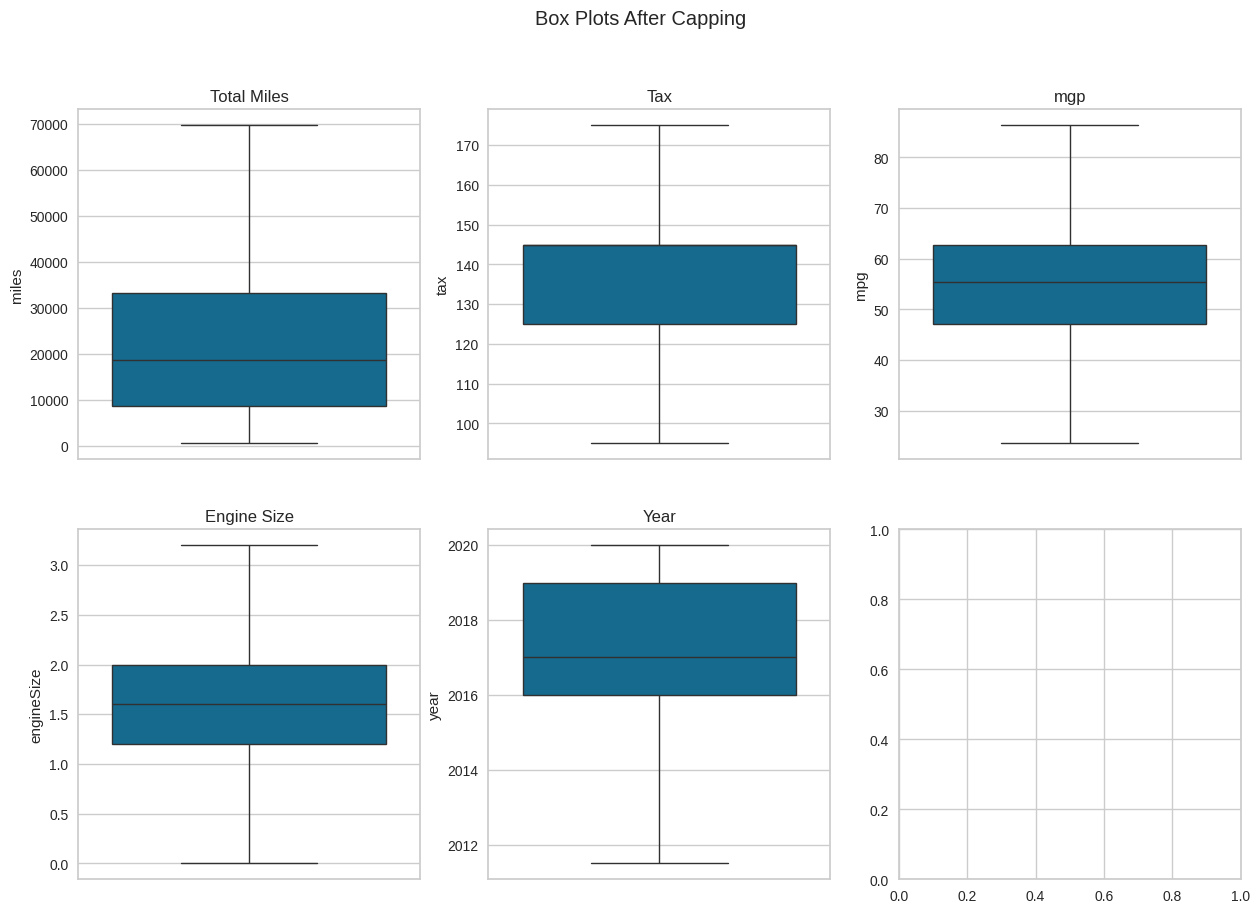

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(y='miles',ax=axes[0,0],data=df_cap)
sns.boxplot(y='tax',ax=axes[0,1],data=df_cap)
sns.boxplot(y='mpg',ax=axes[0,2],data=df_cap)
sns.boxplot(y='engineSize',ax=axes[1,0],data=df_cap)
sns.boxplot(y='year',ax=axes[1,1],data=df_cap)
axes[0,0].set_title('Total Miles')
axes[0,1].set_title('Tax')
axes[0,2].set_title('mgp')
axes[1,0].set_title('Engine Size')
axes[1,1].set_title('Year')
plt.suptitle('Box Plots After Capping')
plt.show()

In [ ]:
from pycaret.regression import*
setup(df_cap,target='price')

,Description,Value
0,Session id,5090
1,Target,price
2,Target type,Regression
3,Original data shape,"(93266, 10)"
4,Transformed data shape,"(93266, 10)"
5,Transformed train set shape,"(65286, 10)"
6,Transformed test set shape,"(27980, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1171.8507,3109152.1699,1762.5485,0.9622,0.1098,0.0782,0.4970
rf,Random Forest Regressor,1148.4891,3264919.1305,1806.0966,0.9603,0.1083,0.0761,22.7020
et,Extra Trees Regressor,1198.9578,3508682.8727,1872.6157,0.9573,0.1130,0.0795,14.4570
lightgbm,Light Gradient Boosting Machine,1364.6606,4043029.6990,2009.4441,0.9508,0.1242,0.0921,2.1160
dt,Decision Tree Regressor,1449.0500,5485893.0094,2341.2262,0.9333,0.1381,0.0951,0.4800
gbr,Gradient Boosting Regressor,1869.4065,7454019.3810,2729.4439,0.9094,0.1615,0.1249,6.1890
ridge,Ridge Regression,3173.0090,18985274.6294,4356.9025,0.7691,0.3755,0.2353,0.0500
br,Bayesian Ridge,3172.9999,18985275.8999,4356.9027,0.7691,0.3756,0.2353,0.0660
llar,Lasso Least Angle Regression,3172.8797,18985280.5667,4356.9035,0.7691,0.3746,0.2353,0.0490
lasso,Lasso Regression,3172.8800,18985280.5703,4356.9035,0.7691,0.3746,0.2353,0.0840


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=5090, ...)

In [ ]:
# 1399.3715	4425689.1861	2102.5815	0.9463	0.1278	0.0925
# 1329.9957	4436678.3436	2104.7177	0.9461	0.1223	0.0869
# XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
#              colsample_bylevel=None, colsample_bynode=None,
#              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
#              enable_categorical=False, eval_metric=None, feature_types=None,
#              gamma=None, grow_policy=None, importance_type=None,
#              interaction_constraints=None, learning_rate=None, max_bin=None,
#              max_cat_threshold=None, max_cat_to_onehot=None,
#              max_delta_step=None, max_depth=None, max_leaves=None,
#              min_child_weight=None, missing=nan, monotone_constraints=None,
#              multi_strategy=None, n_estimators=None, n_jobs=-1,
#              num_parallel_tree=None, random_state=3379, ...)

# Initializing The Model

In [ ]:
xgb=XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=7277)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=7277, ...)

# Testing The Model

In [ ]:
y_pred=xgb.predict(X_test)
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score :',r2_score(y_test,y_pred))

MAE : 1164.1636607630242
MSE : 3069671.513886706
RSE : 1752.0478058222914
r2_score : 0.962373391776616


# Model Deployment

In [ ]:
pickle.dump(xgb,open('carmodel.sav','wb'))
pickle.dump(mms,open('carscaler.sav','wb'))